In [1]:
# Data manipulation libraries
import pandas as pd 
import numpy as np 

# Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [2]:
data = pd.read_csv('D:/3rd Year - 2nd Semester/ST 3082 - Statistical Learning I/Data Analysis Final Project/Stroke Prediction/healthcare-dataset-stroke-data.csv')
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.drop(['id'],axis=1,inplace=True)
data['work_type'] = data['work_type'].replace('Self-employed', 'Self_employed')
data['smoking_status'] = data['smoking_status'].replace('formerly smoked', 'formerly_smoked')
data['smoking_status'] = data['smoking_status'].replace('never smoked', 'never_smoked')

In [4]:
#Removing the other from gender
data.drop(data[data['gender'] == 'Other'].index, inplace = True)
data["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder

DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = data[['age','gender','ever_married','Residence_type','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1}).astype(np.uint8)
X.Residence_type = X.Residence_type.replace({'Urban':0,'Rural':1}).astype(np.uint8)
X.ever_married = X.ever_married.replace({'No':0,'Yes':1}).astype(np.uint8)
Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender','ever_married','Residence_type']]),index=Missing.index)
data.loc[Missing.index,'bmi'] = predicted_bmi


In [6]:
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,32.582353,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,1,0,0,0,1,0


In [7]:
data.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Male                         uint8
ever_married_Yes                    uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self_employed             uint8
work_type_children                  uint8
Residence_type_Urban                uint8
smoking_status_formerly_smoked      uint8
smoking_status_never_smoked         uint8
smoking_status_smokes               uint8
dtype: object

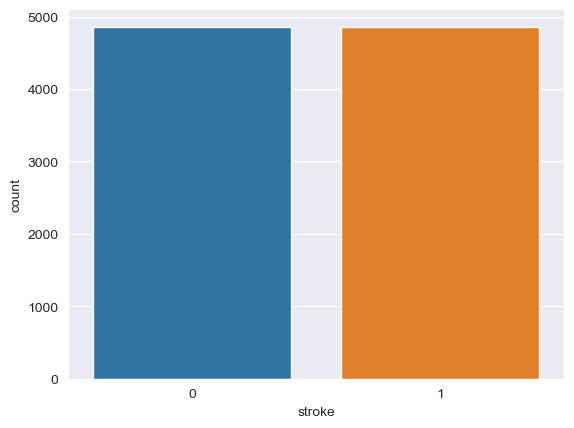

In [8]:
# Using SMOTE
from imblearn.over_sampling import SMOTE

sampler = SMOTE(random_state = 42)
X = data.drop(['stroke'],axis=1)
y = data[['stroke']]
X,y= sampler.fit_resample(X,y['stroke'].values.ravel())
y = pd.DataFrame({'stroke':y})
sns.countplot(data = y, x = 'stroke', y= None)
plt.show()

In [9]:
# Joining back dataset
data = pd.concat([X,y],axis = 1)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,0,1,1,0,0,1
1,61.0,0,0,202.21,32.582353,0,1,0,0,1,0,0,0,1,0,1
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,0,0,0,1,0,1
3,49.0,0,0,171.23,34.400000,0,1,0,1,0,0,1,0,0,1,1
4,79.0,1,0,174.12,24.000000,0,1,0,0,1,0,0,0,1,0,1


In [10]:
# shuffling the dataset before model development
data = data.sample(frac = 1)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,stroke
6277,76.769747,0,0,191.252526,30.386885,0,1,0,0,0,0,0,0,0,0,1
9689,79.109956,1,0,175.552221,31.267219,0,1,0,1,0,0,0,1,0,0,1
6301,78.364677,0,0,216.866363,27.310547,0,1,0,0,0,0,1,0,0,0,1
848,53.000000,0,0,189.490000,25.800000,0,1,0,0,0,0,0,0,0,0,0
8461,73.749726,0,0,70.302733,29.151920,0,1,0,0,0,0,0,0,1,0,1


In [11]:
from sklearn.model_selection import train_test_split

np.random.seed(42)  # set the random seed for reproducibility

X = data.drop(['stroke'], axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
### OLD REFS

# Dementia - https://github.com/PUUDI/statistic_learning_project2/blob/main/statistics_learning_project_2.ipynb
# https://bradleyboehmke.github.io/HOML/knn.html
# https://www.kaggle.com/code/harshghadiya/model-evaluation-100-acc-f-1-auc-roc-curve
# https://www.kaggle.com/code/kaanboke/beginner-friendly-end-to-end-ml-project-enjoy
# https://www.kaggle.com/code/rachidyz/eda-and-modeling-for-predicting-stroke
# https://www.kaggle.com/code/namanmanchanda/stroke-eda-and-ann-prediction#5.-Data-preprocessing-
# https://www.kaggle.com/code/thomaskonstantin/analyzing-and-modeling-stroke-data

In [13]:
### NEW REFS

# https://www.kaggle.com/code/namanmanchanda/stroke-eda-and-ann-prediction#5.-Data-preprocessing-
# https://bradleyboehmke.github.io/HOML/knn.html
# https://www.kaggle.com/code/siddheshera/stroke-eda-smote-9-models-90-accuracy#Feature-Scaling-
# https://www.kaggle.com/code/mechatronixs/prediction-with-7-classification-models-roc-auc#Modeling
# https://www.kaggle.com/code/galaxygeorge/stroke-prediction-eda-fe-model#Data-for-Model
# https://www.kaggle.com/code/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5#One-Step-Further:-Logistic-Regression-with-LIME
# https://www.kaggle.com/code/rachidyz/eda-and-modeling-for-predicting-stroke#fixing_dataset
# https://www.kaggle.com/code/harshghadiya/model-evaluation-100-acc-f-1-auc-roc-curve
# https://github.com/PUUDI/statistic_learning_project2/blob/main/statistics_learning_project_2.ipynb



In [14]:
#ROC Curve Reference - https://towardsdatascience.com/interpreting-roc-curve-and-roc-auc-for-classification-evaluation-28ec3983f077

In [15]:
###Libraries for Modedl Fitting

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [16]:

X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
6502,64.031224,0,0,114.683601,29.603730,0,1,0,0,0,0,0,0,0,0
6093,51.535570,0,0,217.553537,49.846577,0,1,0,1,0,0,0,0,0,0
8204,70.861903,0,0,96.580839,25.344601,0,0,0,1,0,0,0,0,0,0
2076,8.000000,0,0,96.620000,16.400000,0,0,0,0,0,1,1,0,0,0
5496,61.258096,0,0,75.937075,27.429048,1,1,0,0,0,0,0,0,0,0


### Defining Functions to easily create Confusion matric and ROC curve for each model

In [17]:
### Function For ROC Curve
#Inputs are y_test and y_prob
#Make sure to calculate y_prob in each model before generating ROC curve

def plot_ROC(y_test, y_prob):
    from sklearn import metrics
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    sns.set_theme(style = 'white')
    plt.figure(figsize = (3, 3))
    plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [18]:
### Function For Confusion matrix

def plot_confusion_matrix(y_test, y_pred):
    acc = round(accuracy_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show(block=True)

## <u> Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
logistic_model = LR.fit(X_train,y_train)
y_pred=logistic_model.predict(X_test)
class_report=classification_report(y_test,y_pred)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[843 127]
 [151 823]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       970
           1       0.87      0.84      0.86       974

    accuracy                           0.86      1944
   macro avg       0.86      0.86      0.86      1944
weighted avg       0.86      0.86      0.86      1944



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



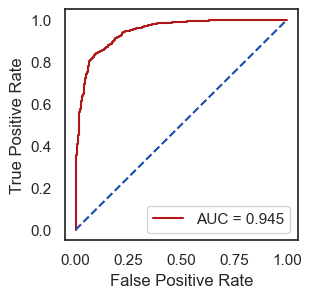

In [23]:
###Using the function that we defined above to create ROC 

y_prob = logistic_model.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)

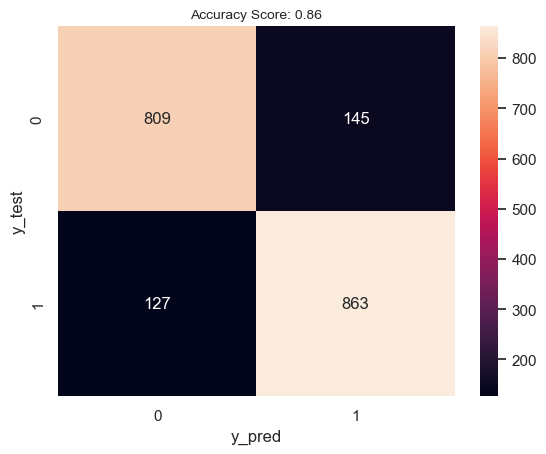

In [24]:
###Using the function that we defined above to create confusion matrix

plot_confusion_matrix(y_test, y_pred)

In [29]:
# 5-Fold Cross Validation

#Cross Validation provides a more reliable estimate
#of the model's performance than Hold-Out validation, and it can help to reduce the risk of overfitting.
#Hold out cv is same as we divide dataset in train and test and, train on trainset and test on test set.

from sklearn.model_selection import train_test_split, cross_validate

cv_results = cross_validate(logistic_model,
                            X_train, y_train,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())
print("test_roc_auc: ", cv_results['test_roc_auc'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\lib\site-packages

test_accuracy:  0.9502309491729969
test_f1:  0.9487956909143067
test_roc_auc:  0.9865625660954127


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [29]:
#Trying to check overfiitng by predicting training set

y_pred=logistic_model.predict(X_train)
class_report=classification_report(y_train,y_pred)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_train, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_train,y_pred))

=== Confusion Matrix ===
[[3338  552]
 [ 523 3363]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3890
           1       0.86      0.87      0.86      3886

    accuracy                           0.86      7776
   macro avg       0.86      0.86      0.86      7776
weighted avg       0.86      0.86      0.86      7776



## <u>KNeighborsClassifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:, 1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[775 179]
 [ 20 970]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.81      0.89       954
           1       0.84      0.98      0.91       990

    accuracy                           0.90      1944
   macro avg       0.91      0.90      0.90      1944
weighted avg       0.91      0.90      0.90      1944



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [31]:
### Cross Validation  (((Acutally, not necessary. Remove if confusing)))
cv_results = cross_validate(knn_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())
print("test_roc_auc: ", cv_results['test_roc_auc'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

test_accuracy:  0.8906884665933757
test_f1:  0.8996938461224664
test_roc_auc:  0.948827756037798


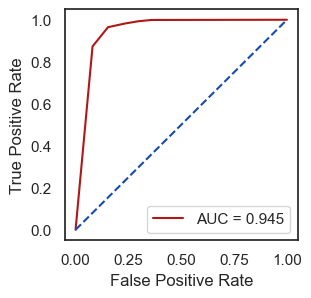

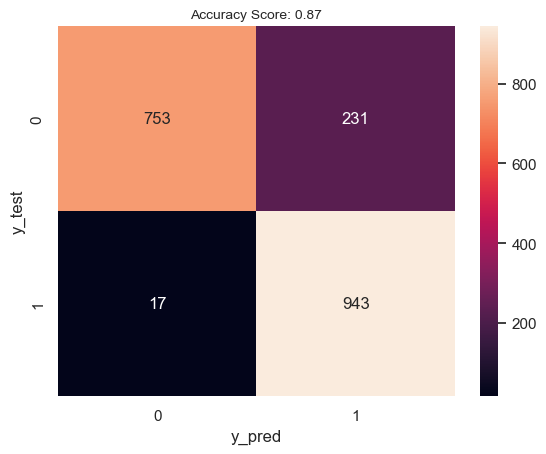

In [67]:
###Using the function that we defined above to create ROC and confusion matrix

y_prob = knn_model.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)
plot_confusion_matrix(y_test, y_pred)

## <u> SVM

In [26]:
svc = SVC(random_state = 22, probability = True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[680 274]
 [167 823]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.80      0.71      0.76       954
           1       0.75      0.83      0.79       990

    accuracy                           0.77      1944
   macro avg       0.78      0.77      0.77      1944
weighted avg       0.78      0.77      0.77      1944



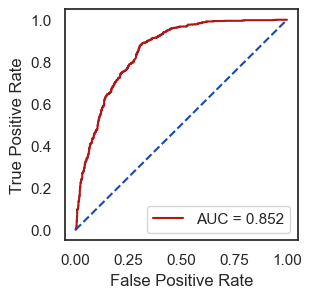

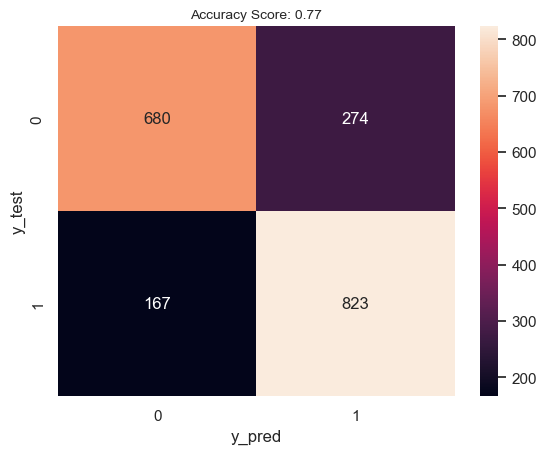

In [27]:
###Using the function that we defined above to create ROC and confusion matrix

y_prob = svc.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)
plot_confusion_matrix(y_test, y_pred)

## <u> Random Forest Classifier

In [28]:
rf = RandomForestClassifier(random_state = 42, max_depth = 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[764 190]
 [ 97 893]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       954
           1       0.82      0.90      0.86       990

    accuracy                           0.85      1944
   macro avg       0.86      0.85      0.85      1944
weighted avg       0.86      0.85      0.85      1944



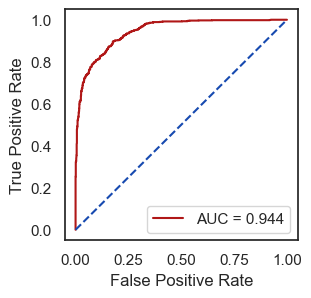

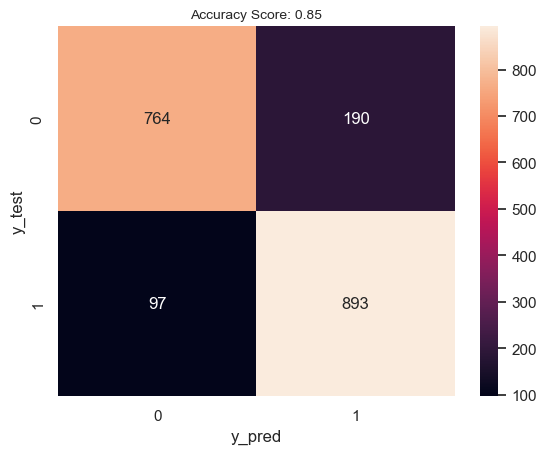

In [29]:
###Using the function that we defined above to create ROC and confusion matrix

y_prob = rf.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)
plot_confusion_matrix(y_test, y_pred)

In [31]:
# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(15))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train.columns.to_list()[i]
f_imp3['importance'] = rf.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'Blues')

,feature,importance
0,age,0.434762
3,avg_glucose_level,0.109608
13,smoking_status_never_smoked,0.079908
10,work_type_children,0.076336
4,bmi,0.073867
14,smoking_status_smokes,0.047584
8,work_type_Private,0.046277
11,Residence_type_Urban,0.032234
12,smoking_status_formerly_smoked,0.029962
5,gender_Male,0.026987


## <u>XGBoost

In [20]:
xgb = XGBClassifier(random_state = 42, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[927  43]
 [ 48 926]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       970
           1       0.96      0.95      0.95       974

    accuracy                           0.95      1944
   macro avg       0.95      0.95      0.95      1944
weighted avg       0.95      0.95      0.95      1944



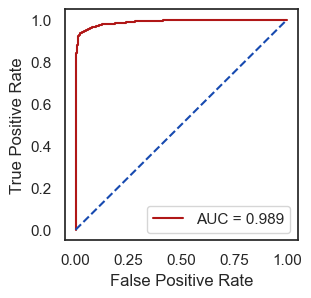

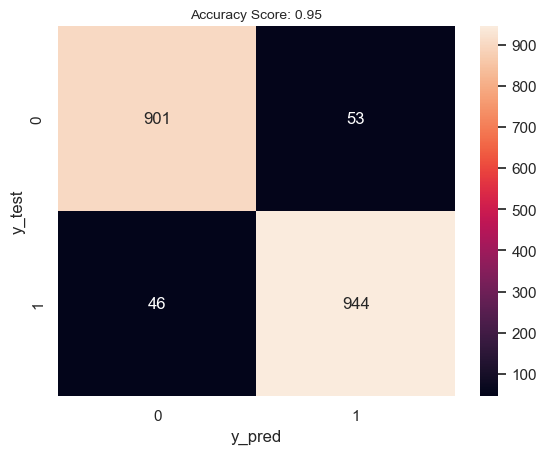

In [33]:
###Using the function that we defined above to create ROC and confusion matrix

y_prob =xgb.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)
plot_confusion_matrix(y_test, y_pred)

In [34]:
# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(15))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train.columns.to_list()[i]
f_imp3['importance'] = xgb.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'Blues')

,feature,importance
14,smoking_status_smokes,0.162378
13,smoking_status_never_smoked,0.145021
12,smoking_status_formerly_smoked,0.133680
0,age,0.096308
9,work_type_Self_employed,0.086984
6,ever_married_Yes,0.055831
11,Residence_type_Urban,0.053806
2,heart_disease,0.052610
5,gender_Male,0.050502
8,work_type_Private,0.048127


In [81]:
#I got this error firstly-
#IndexError                                Traceback (most recent call last)
#Cell In[41], line 4
#      2 f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(26))
#      3 for i in range(len(f_imp3.index)):
#----> 4     f_imp3.iloc[i, 0] = X_train.columns.to_list()[i]
#      5 f_imp3['importance'] = xgb.feature_importances_
#      6 f_imp3 = f_imp3.sort_values('importance', ascending = False)

#IndexError: list index out of range

#Solution -
# This error occurs when the index value used in the iloc function is out of range.
#In this case, it is happening in the line f_imp3.iloc[i, 0] = X_train.columns.to_list()[i], where i is the index value.
#It seems like the index value i is greater than or equal to the length of the X_train.columns.to_list() list.
#This can happen if the number of columns in the X_train dataframe is less than 26.
#To fix this error, you can try printing the length of X_train.columns.to_list() and make sure it is at least 26.
#If it is less than 26, you can modify the range(26) argument in the pd.DataFrame() function to match the actual number of columns in X_train.

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Define the parameter distribution for randomized search
param_dist = {
    'max_depth': np.arange(3, 7),  # Example values for max_depth
    'learning_rate': np.logspace(-3, 0, num=100),  # Example values for learning_rate
    'n_estimators': np.arange(100, 400, 50),  # Example values for n_estimators
    # Add more hyperparameters to tune as needed
}

# Initialize the XGBClassifier model
#xgb = XGBClassifier(random_state=42, objective='binary:logistic', eval_metric='logloss')

# Perform Randomized Search Cross Validation (RandomizedSearchCV) for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, cv=5,
                                   n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the RandomizedSearchCV
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)




Best Hyperparameters:  {'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.5336699231206312}


In [22]:
# Train the XGBClassifier model with the best hyperparameters
best_xgb = XGBClassifier(random_state=42, objective='binary:logistic', eval_metric='logloss',
                         max_depth=best_params['max_depth'],
                         learning_rate=best_params['learning_rate'],
                         n_estimators=best_params['n_estimators'])
best_xgb.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate the performance of the tuned model
# Add your evaluation code here

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[932  38]
 [ 46 928]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       970
           1       0.96      0.95      0.96       974

    accuracy                           0.96      1944
   macro avg       0.96      0.96      0.96      1944
weighted avg       0.96      0.96      0.96      1944



C:\Users\Samujitha\AppData\Local\Temp\ipykernel_14084\3510246529.py:15: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

C:\Users\Samujitha\AppData\Local\Temp\ipykernel_14084\3510246529.py:15: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

C:\Users\Samujitha\AppData\Local\Temp\ipykernel_14084\3510246529.py:15: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

C:\Users\Samujitha\AppData\Local\Temp\ipykernel_14084\3510246529.py:15: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

C:\Users\Samujitha\AppData\Local\Temp\ipykernel_14084\3510246529.py:15: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

C:\Users\Samujitha\AppData\Local\Temp\ipykernel_14084\3510246529.py:15: DeprecationWarning

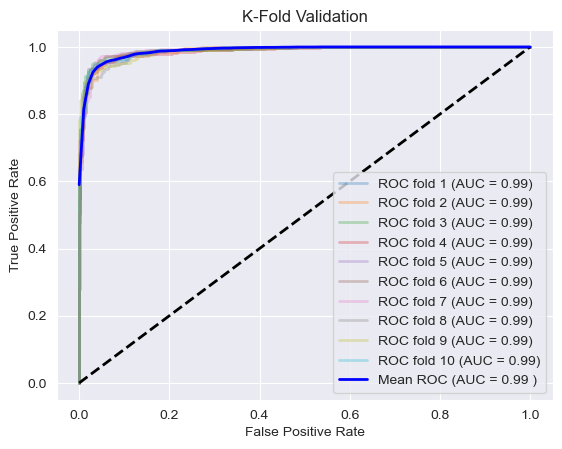

In [27]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn import metrics

cv = StratifiedKFold(n_splits=10, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = xgb.fit(X_train.iloc[train], y_train.iloc[train]).predict_proba(X_train.iloc[test])
    fpr, tpr, t = metrics.roc_curve(y_train.iloc[test], prediction[:, 1])
    tprs.append(scipy.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1

plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")
plt.show()


## <u> AdaBoost Classifier 

In [35]:
Ada = AdaBoostClassifier(n_estimators=2000, random_state = 42)
Ada.fit(X_train, y_train)
y_pred = Ada.predict(X_test)
y_prob = Ada.predict_proba(X_test)[:,1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[867  87]
 [ 74 916]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       954
           1       0.91      0.93      0.92       990

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944



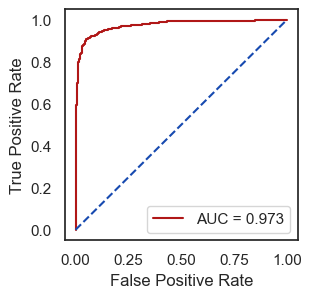

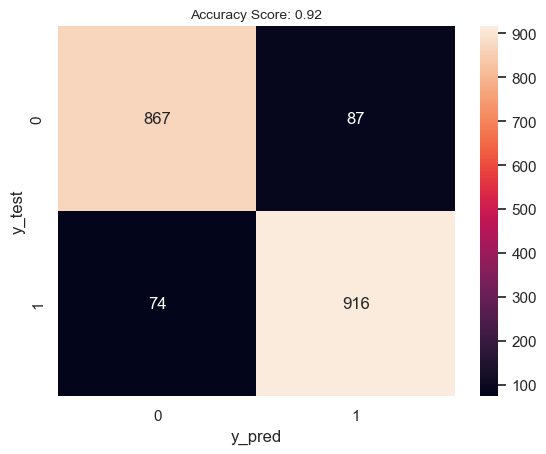

In [36]:
###Using the function that we defined above to create ROC and confusion matrix

y_prob =Ada.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)
plot_confusion_matrix(y_test, y_pred)

In [28]:
# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(20))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train.columns.to_list()[i]
f_imp3['importance'] = Ada.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'Blues')

,feature,importance
0,age,0.307500
3,avg_glucose_level,0.280000
4,bmi,0.182000
6,gender_Male,0.025000
5,gender_Female,0.024000
14,Residence_type_Rural,0.023000
15,Residence_type_Urban,0.022500
18,smoking_status_never_smoked,0.018000
11,work_type_Private,0.017000
17,smoking_status_formerly_smoked,0.016500


In [71]:
### Hyper parameter tuning

from sklearn.model_selection import GridSearchCV

# Create grid search object
params = {'n_estimators': [100,200,500,700], 'learning_rate' : [0.01,0.05,0.1,0.3,1]}
grid = GridSearchCV(Ada, params)

# Fit on data
grid.fit(X_train, y_train)

# Get best parameters
print(grid.best_params_)

{'learning_rate': 0.3, 'n_estimators': 500}


In [32]:
Ada1 = AdaBoostClassifier(n_estimators=500, learning_rate=0.3, random_state = 42)
Ada1.fit(X_train, y_train)
y_pred = Ada1.predict(X_test)
y_prob = Ada1.predict_proba(X_test)[:,1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))


=== Confusion Matrix ===
[[983  12]
 [ 65 884]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       995
           1       0.99      0.93      0.96       949

    accuracy                           0.96      1944
   macro avg       0.96      0.96      0.96      1944
weighted avg       0.96      0.96      0.96      1944



In [34]:
# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(20))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train.columns.to_list()[i]
f_imp3['importance'] = Ada1.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'Blues')

,feature,importance
0,age,0.084000
14,Residence_type_Rural,0.082000
15,Residence_type_Urban,0.080000
3,avg_glucose_level,0.072000
5,gender_Female,0.072000
11,work_type_Private,0.070000
18,smoking_status_never_smoked,0.070000
6,gender_Male,0.070000
12,work_type_Self_employed,0.066000
17,smoking_status_formerly_smoked,0.060000


## <u> CatBoost Classifier

In [31]:
cat = CatBoostClassifier(logging_level='Silent')
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
y_prob = cat.predict_proba(X_test)[:,1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))


=== Confusion Matrix ===
[[982  13]
 [ 50 899]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       995
           1       0.99      0.95      0.97       949

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944



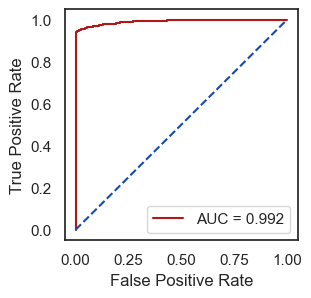

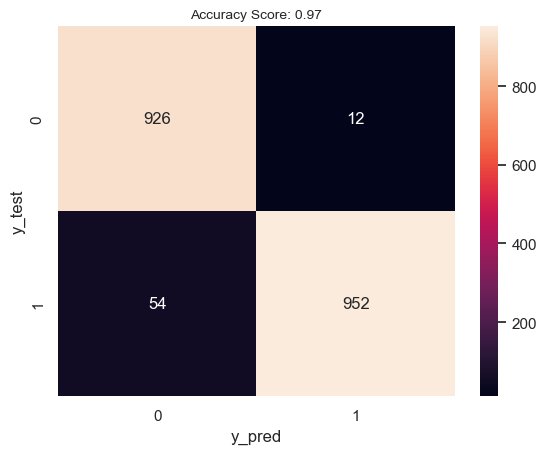

In [30]:
###Using the function that we defined above to create ROC and confusion matrix

y_prob =cat.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)
plot_confusion_matrix(y_test, y_pred)

In [35]:
# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(20))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train.columns.to_list()[i]
f_imp3['importance'] = cat.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'Blues')

,feature,importance
18,smoking_status_never_smoked,10.386306
0,age,9.830836
15,Residence_type_Urban,8.566778
16,smoking_status_Unknown,8.375161
14,Residence_type_Rural,8.331961
11,work_type_Private,7.047223
17,smoking_status_formerly_smoked,6.971937
5,gender_Female,6.710000
6,gender_Male,6.075940
19,smoking_status_smokes,5.236442


In [36]:
import pickle
pickle.dump(cat,open('cat_try.pkl','wb'))

In [74]:
import pickle
pickle.dump(Ada,open('Ada_try.pkl','wb'))

In [32]:
import pickle
pickle.dump(xgb,open('xgb_try2.pkl','wb'))

In [43]:
model=pickle.load(open('Ada_try.pkl','rb'))
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- smoking_status_formerly_smoked
- smoking_status_never_smoked
- work_type_Self_employed
Feature names seen at fit time, yet now missing:
- smoking_status_formerly smoked
- smoking_status_never smoked
- work_type_Self-employed




array([[934,   4],
       [ 67, 939]], dtype=int64)

In [46]:
model1=pickle.load(open('knn_try.pkl','rb'))

y_pred = model1.predict(X_test)
confusion_matrix(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



array([[747, 191],
       [ 16, 990]], dtype=int64)

In [40]:
knn_model 
pickle.dump(knn_model,open('knn_try.pkl','wb'))

In [49]:
model1=pickle.load(open('xgb_try2.pkl','rb'))

y_pred = model1.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[920,  18],
       [ 51, 955]], dtype=int64)

In [58]:
age=90
bmi=90
avg_glucose_level=99
ever_married_Yes=1
ever_married_No=0
hypertension=1
heart_disease=1
gender_Male=1
gender_Female=0
Residence_type_Urban=1
Residence_type_Rural=0
smoking_status_smokes=1
smoking_status_formerly_smoked=0
smoking_status_never_smoked=0
smoking_status_Unknown=0
work_type_Govt_job=1
work_type_Never_worked=0
work_type_Private=0
work_type_Self_employed=0
work_type_children=0


y_pred = model.predict([[90,
90,
99,
1,
0,
1,
1,
1,
0,
1,
0,
1,
0,
0,
0,
1,
0,
0,
0,
0]])

y_pred



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



array([0], dtype=int64)

In [87]:
df=[90,1,1,143,90,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0]

In [72]:
type(X_test[0])

InvalidIndexError: (1, slice(None, None, None))

In [68]:
df=df.reshape(1,-1)
y_pred1 = model.predict(df)
y_pred1

AttributeError: 'list' object has no attribute 'reshape'

In [73]:
X_test[0]

KeyError: 0

In [78]:

X_test.iloc[0]

age                                78.439022
hypertension                        0.000000
heart_disease                       0.000000
avg_glucose_level                 142.051217
bmi                                28.477237
gender_Female                       0.000000
gender_Male                         1.000000
ever_married_No                     0.000000
ever_married_Yes                    1.000000
work_type_Govt_job                  0.000000
work_type_Never_worked              0.000000
work_type_Private                   1.000000
work_type_Self_employed             0.000000
work_type_children                  0.000000
Residence_type_Rural                0.000000
Residence_type_Urban                1.000000
smoking_status_Unknown              0.000000
smoking_status_formerly_smoked      0.000000
smoking_status_never_smoked         0.000000
smoking_status_smokes               0.000000
Name: 7468, dtype: float64

In [79]:
type(X_test.iloc[0])

pandas.core.series.Series

In [82]:
X_test.iloc[0].shape

(20,)

In [81]:
df=pd.Series(df)
df

0    [90, 90, 99, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, ...
dtype: object

In [88]:
#df=pd.Series(df)

df = pd.DataFrame(df, columns=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self_employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly_smoked', 'smoking_status_never_smoked', 'smoking_status_smokes'])

y_pred1 = model.predict(df)
y_pred1

ValueError: Shape of passed values is (20, 1), indices imply (20, 20)

In [91]:
df=[[90,1,1,143,90,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0]]

In [97]:
df = pd.DataFrame(df, columns=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self_employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly_smoked', 'smoking_status_never_smoked', 'smoking_status_smokes'])
df


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,90,1,1,143,90,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0


In [98]:
model1=pickle.load(open('Ada_try.pkl','rb'))

In [99]:
y_pred1 = model.predict(df)
y_pred1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- smoking_status_formerly_smoked
- smoking_status_never_smoked
- work_type_Self_employed
Feature names seen at fit time, yet now missing:
- smoking_status_formerly smoked
- smoking_status_never smoked
- work_type_Self-employed




array([0], dtype=int64)

In [101]:
y_pred1 = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- smoking_status_formerly_smoked
- smoking_status_never_smoked
- work_type_Self_employed
Feature names seen at fit time, yet now missing:
- smoking_status_formerly smoked
- smoking_status_never smoked
- work_type_Self-employed




In [103]:
y_pred1[0]

1

In [ ]:
age                                78.439022
hypertension                        0.000000
heart_disease                       0.000000
avg_glucose_level                 142.051217
bmi                                28.477237
gender_Female                       0.000000
gender_Male                         1.000000
ever_married_No                     0.000000
ever_married_Yes                    1.000000
work_type_Govt_job                  0.000000
work_type_Never_worked              0.000000
work_type_Private                   1.000000
work_type_Self_employed             0.000000
work_type_children                  0.000000
Residence_type_Rural                0.000000
Residence_type_Urban                1.000000
smoking_status_Unknown              0.000000
smoking_status_formerly_smoked      0.000000
smoking_status_never_smoked         0.000000
smoking_status_smokes               0.000000

In [104]:
df=[[78.439022,0.000000,0.000000,142.051217,28.477237,0.000000,1,0,1,0,0,1,0,0,0,1,0,0,0,0]]

In [105]:

df = pd.DataFrame(df, columns=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self_employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly_smoked', 'smoking_status_never_smoked', 'smoking_status_smokes'])
df


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,78.439022,0.0,0.0,142.051217,28.477237,0.0,1,0,1,0,0,1,0,0,0,1,0,0,0,0


In [106]:
y_pred1 = model.predict(df)
y_pred1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- smoking_status_formerly_smoked
- smoking_status_never_smoked
- work_type_Self_employed
Feature names seen at fit time, yet now missing:
- smoking_status_formerly smoked
- smoking_status_never smoked
- work_type_Self-employed




array([1], dtype=int64)

In [37]:
model2=pickle.load(open('cat_try.pkl','rb'))

In [38]:
df=[[78.439022,0.000000,0.000000,142.051217,28.477237,0.000000,1,0,1,0,0,1,0,0,0,1,0,0,0,0]]
df = pd.DataFrame(df, columns=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self_employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly_smoked', 'smoking_status_never_smoked', 'smoking_status_smokes'])
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,78.439022,0.0,0.0,142.051217,28.477237,0.0,1,0,1,0,0,1,0,0,0,1,0,0,0,0


In [39]:
y_pred2 = model2.predict(df)
y_pred2

array([1], dtype=int64)

In [42]:
y_pred2 = model2.predict(X_test)
y_pred2

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [43]:
y_pred2[0]

0

In [33]:
### Applying CV

import time
from sklearn.model_selection import cross_val_score

models = [RandomForestClassifier(), LogisticRegression(solver='liblinear'),XGBClassifier(random_state = 42, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss'),AdaBoostClassifier(n_estimators=2000, random_state = 42)]
names = ["Random Forest", "Logistic Regression","XGB","AdaBoost"]
for model, name in zip(models, names):
    print(name)
    start = time.time()
    for score in ["accuracy", "precision", "recall"]:
        print(score," : ",cross_val_score(model, X_train, y_train ,scoring=score, cv=5).mean())
       
    print('Time elapsed: ',time.time() - start)
    print('\n')
     

Random Forest
accuracy  :  0.9441870903214606
precision  :  0.9366437730265919
recall  :  0.9575388829887543
Time elapsed:  8.915091514587402


Logistic Regression
accuracy  :  0.860467601815191
precision  :  0.8575493227641138
recall  :  0.8646408803221142
Time elapsed:  0.515087366104126


XGB
accuracy  :  0.9476583539291943
precision  :  0.9380333725450998
recall  :  0.9585674914723757
Time elapsed:  6.667994260787964


AdaBoost
accuracy  :  0.9092080443713371
precision  :  0.9063283761366441
recall  :  0.9127614945095666
Time elapsed:  170.01910829544067


